## Lab 2 (Classification1)

1. Read the Iris dataset from Scikit  Learn using sklearn datasets.load. 

2. use scikit-learn train_test_split to randomly split the data into training (75%) and testing (25%) set. 

2. Using scikit-learn neighbors.KNeighborsClassifier to build a basic kNN classifier model for this dataset. You can use either metrics.accuracy_score, or knn.score to obtain the prediction accuracy.

3. Explore the impact of adopting various values of k (k=1, 3, 5, 7) on your model, different distance metrics and algorithms. 


4. Next normalise the data and re-run the experiment to see the impact on the prediction. 

In [23]:
# Task 1: Load the Iris dataset
import pandas as pd
from IPython.core.pylabtools import figsize
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 4)
y shape: (150,)


In [22]:
# Task 2: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [21]:
# Task 3: Build a kNN classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a kNN classifier with k=3 (default)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with k=3:", accuracy)

Accuracy with k=3: 0.9210526315789473


Accuracy with k=1: 0.8947368421052632
Accuracy with k=3: 0.9210526315789473
Accuracy with k=5: 0.9473684210526315
Accuracy with k=7: 0.9736842105263158


[Text(1, 0, '1'), Text(3, 0, '3'), Text(5, 0, '5'), Text(7, 0, '7')]

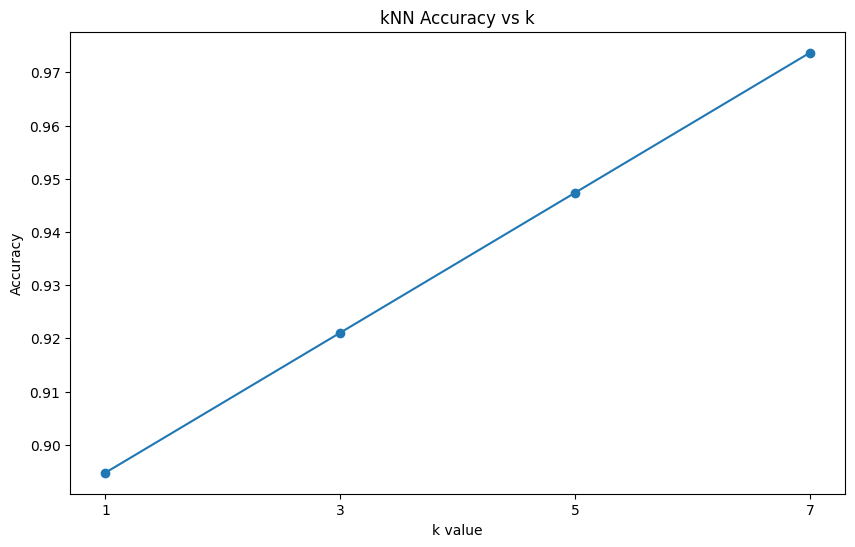

In [20]:
# Task 4: Explore different values of k
import matplotlib.pyplot as plt
k_values = [1, 3, 5, 7]
points = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    points.append((k, accuracy))
    print(f"Accuracy with k={k}:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([k for k, acc in points], [acc for k, acc in points], marker='o')
ax.set_title('kNN Accuracy vs k')
ax.set_xlabel('k value')
ax.set_ylabel('Accuracy')
ax.set_xticks(k_values)
ax.set_xticklabels(k_values)

Accuracy with k=1 (normalized): 0.8947368421052632
Accuracy with k=3 (normalized): 0.8947368421052632
Accuracy with k=5 (normalized): 0.8947368421052632
Accuracy with k=7 (normalized): 0.9210526315789473


[Text(1, 0, '1'), Text(3, 0, '3'), Text(5, 0, '5'), Text(7, 0, '7')]

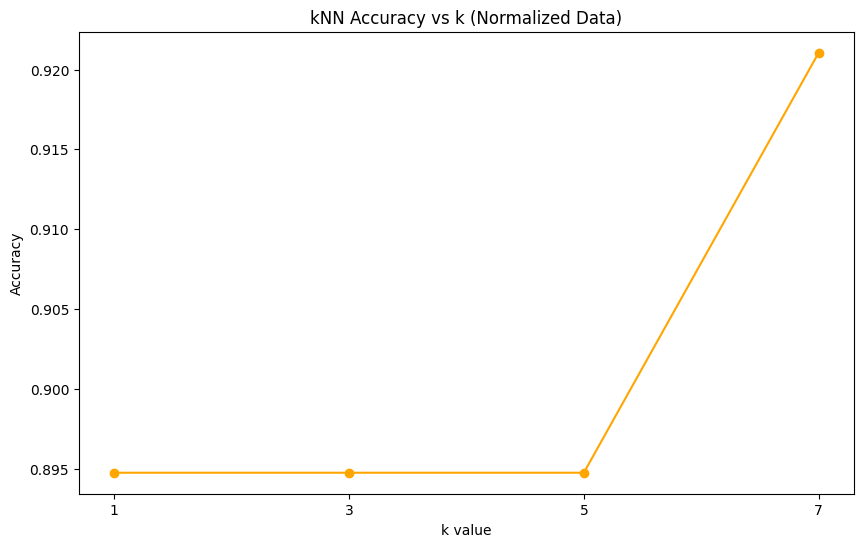

In [19]:
# Task 5: Normalize the data and re-run the experiment
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Re-run the kNN classifier with normalized data
points_scaled = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    points_scaled.append((k, accuracy))
    print(f"Accuracy with k={k} (normalized):", accuracy)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([k for k, acc in points_scaled], [acc for k, acc in points_scaled], marker='o', color='orange')
ax.set_title('kNN Accuracy vs k (Normalized Data)')
ax.set_xlabel('k value')
ax.set_ylabel('Accuracy')
ax.set_xticks(k_values)
ax.set_xticklabels(k_values)